<a href="https://colab.research.google.com/github/TAUforPython/wavelets/blob/main/wavelets_cwt_dwt_example_EEG_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на примеры кода как использовать Wavelet

https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

Примеры научных статей о применении wavelet в биоинформатике:
Грубов В. В., Овчинников А. А., Ситникова Е. Ю., Короновский А. А., Храмов А. Е. Вейвлетный анализ сонных веретен на ЭЭГ и разработка метода их автоматической диагностики // Известия вузов. ПНД. 2011. Т. 19, вып. 4. С. 91-108. DOI: 10.18500/0869-6632-2011-19-4-91-108
[ссылка на статью](https://andjournal.sgu.ru/ru/articles/veyvletnyy-analiz-sonnyh-vereten-na-eeg-i-razrabotka-metoda-ih-avtomaticheskoy-diagnostiki)


In [ ]:
# устанавливаем библиотеку для загрузки зависимостей
# для обработки данных с помощью вейвлетов
!pip install pywavelets
!pip install mne numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 18.3 MB/s eta 0:00:00


In [ ]:
# подгружаем библиотеки
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne

# **Теория - виды материнского вейвлета** (ядро преобразования)

In [ ]:
for family in pywt.families():
    print(f'{family} family: {pywt.wavelist(family)}')

haar family: ['haar']
db family: ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
sym family: ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
coif family: ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
bior family: ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
rbio family: ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3

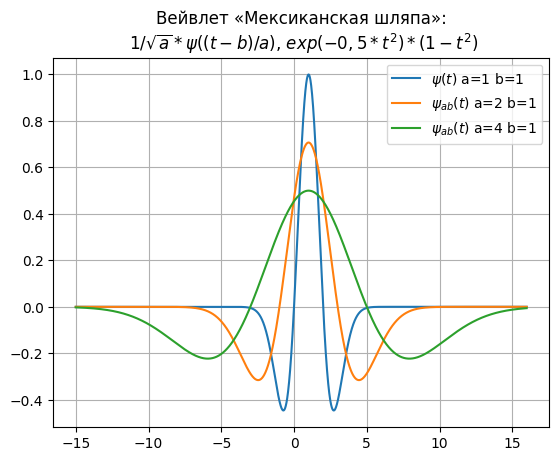

In [ ]:
x = np.arange(-15,16,0.01)
def w(a,b,t):
    f =(1/a**0.5) * np.exp(-0.5*((t-b)/a)**2) * (1 - ((t-b)/a)**2)
    return f
plt.title("Вейвлет «Мексиканская шляпа»:\n $1/\sqrt{a}*\psi({(t-b)}/{a})$, $exp(-0,5*t^{2})*(1 - t^{2})$")

b = 1
y=[w(1,b,t) for t in x]
plt.plot(x,y, label = '$\psi(t)$ a=1 b=1')
y=[w(2,b,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ a=2 b=1")
y=[w(4,b,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ a=4 b=1")
plt.legend(loc='best')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Morle')

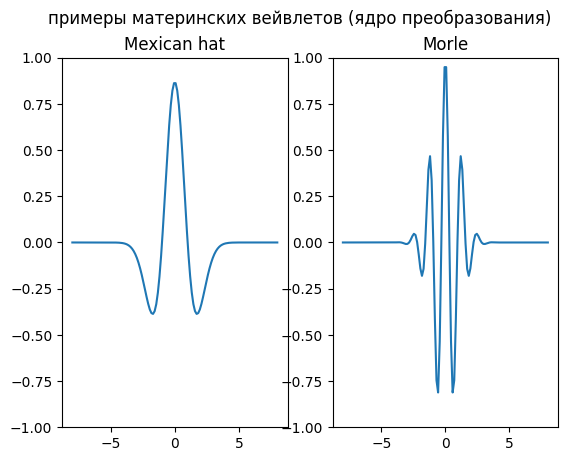

In [ ]:
#discrete wavelet
#wavelet_d = pywt.Wavelet('db5')
#[phi, psi, x] = wavelet_d.wavefun(level=1)
#continous wavelet
# The wavefun() method can be used to calculate approximations of scaling function (phi) and wavelet function (psi) at the given level of refinement.
wavelet_c = pywt.ContinuousWavelet('mexh')
[psi,x] = wavelet_c.wavefun(level = 7)
wavelet_c = pywt.ContinuousWavelet('morl')
[psi_morle,x] = wavelet_c.wavefun(level = 7)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('примеры материнских вейвлетов (ядро преобразования) ')

ax1.plot(x, psi)
ax1.set_ylim(-1, 1)
ax1.set_title("Mexican hat")
#Вейвлет «Мексиканская шляпа»:\n$1/\sqrt{a}*exp(-0,5*t^{2}/a^{2})*(t^{2}-1)$")

ax2.plot(x, psi_morle)
ax2.set_ylim(-1, 1)
ax2.set_title("Morle")

pywt.families() = ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
pywt.wavelist('db') = ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
len(x) = 225


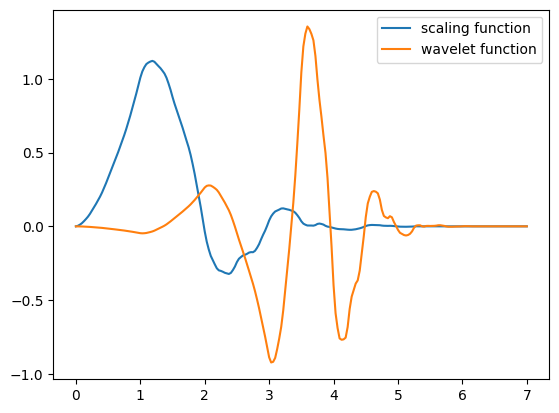

In [ ]:
#### visualize (mother) wavelet and scaling (father wavelet) functions
print('pywt.families() = %s' % pywt.families())
print('pywt.wavelist(\'db\') = %s' % pywt.wavelist('db'))
phi, psi, x = pywt.Wavelet('db4').wavefun(level=5) # level of refinement
print('len(x) = %s' % len(x))

plt.figure()
plt.plot(x,phi,label='scaling function')
plt.plot(x,psi,label='wavelet function')
plt.legend()

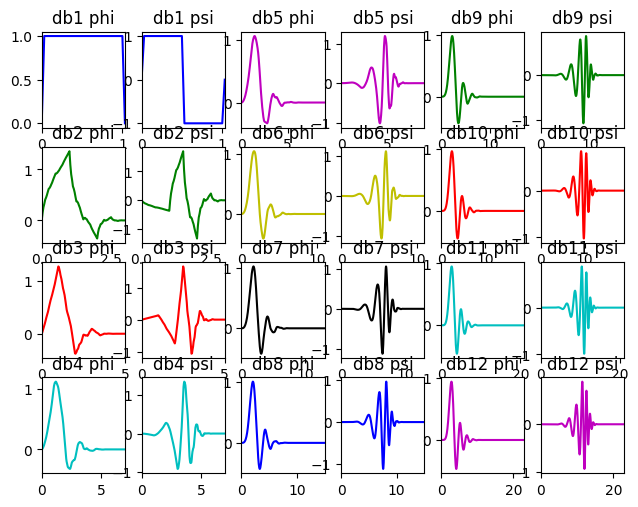

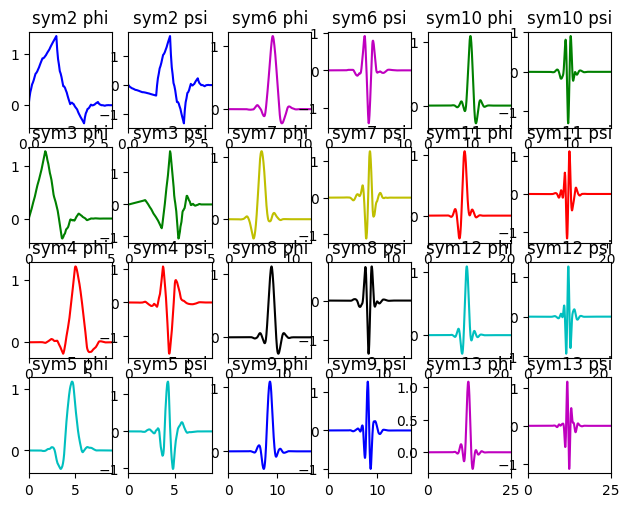

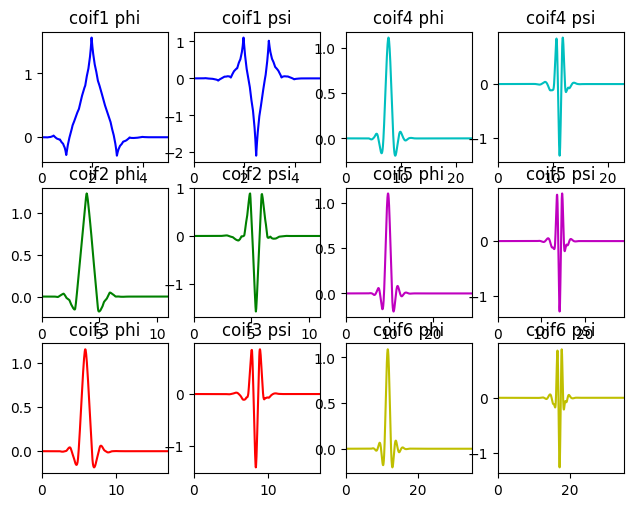

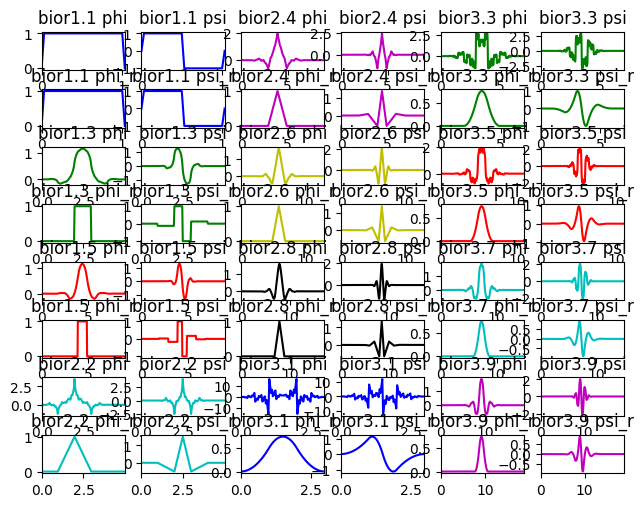

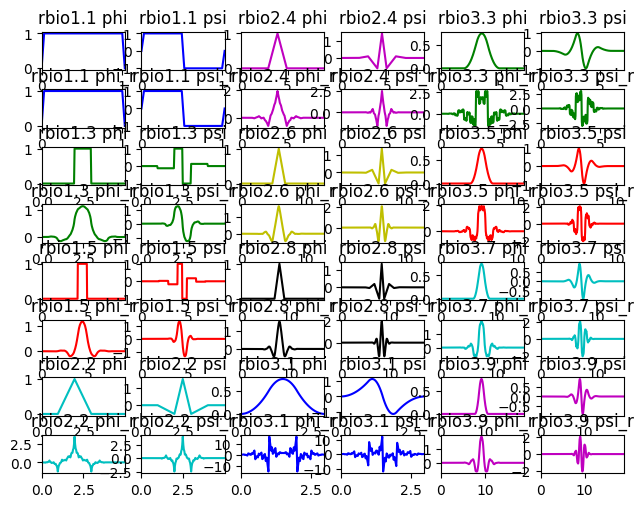

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Plot scaling and wavelet functions for db, sym, coif, bior and rbio families

import itertools

import matplotlib.pyplot as plt

import pywt


plot_data = [('db', (4, 3)),
             ('sym', (4, 3)),
             ('coif', (3, 2))]


for family, (rows, cols) in plot_data:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)
    colors = itertools.cycle('bgrcmyk')

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

for family, (rows, cols) in [('bior', (4, 3)), ('rbio', (4, 3))]:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)

    colors = itertools.cycle('bgrcmyk')
    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
            row *= 2

            color = next(colors)
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 2*(1 + col + row*cols))
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

            row += 1
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi_r")
            ax.plot(x, phi_r, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi_r")
            ax.plot(x, psi_r, color)
            ax.set_xlim(min(x), max(x))

plt.show()

# Создание или загрузка данных для обработки

**запускай что-то одно** - тут примеры разные как исопльзовать Python Google Colab для рабты с данными

In [ ]:
# пример загрузки данных из файла csv
# файл создается в другом google colab notebook
# и вручную переносится сюда (вот пример)
# https://colab.research.google.com/drive/1Uuh2nl5JAuqmTt4ahOwAPlTv9sEuc_Fb?usp=sharing
# в файл локальный на юпитер-ноутбуке сохраняем с именем buffervar.csv любые данные
data_from_csv = np.genfromtxt('buffervar.csv', delimiter=',')
t = np.linspace(0, 40, 2000)
# время сигнала = длительность
T = 40.0
# количество точек в сигнале = число отсчетов
N = 2000
# значения сигнала
y = data_from_csv[:, 0]

In [ ]:
# пример загрузки данных из внешнего файла csv
# загрузить курс доллара
data_usdrub = pd.read_csv("UsdRubTime.csv", sep = ';')

df_usdrub = pd.DataFrame(data_usdrub, columns = ['Close', 'Position'])

print(df_usdrub.head)
y = df_usdrub['Close'].values

T = max(df_usdrub['Position'])
N = len(df_usdrub['Position'])
t = np.linspace(1, T, N)

In [ ]:
# гармонический детерминированный сигнал
# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0.0, T, N)

y = np.cos(1.0 * 2.0*np.pi*t) + 1 * np.cos(12.0 * 2.0*np.pi*t) + 1*np.sin(3.0 * 2.0*np.pi*t)

In [ ]:
# затухающий гармонический сигнал

# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0.0, T, N)
y = np.exp(-t)*np.sin(3.0 * 2.0*np.pi*t)

In [ ]:
# ступенчатный детерминированный сигнал
events = [2.5, 4]
w1=0.5; w2=1;
y = 1*((t > events[0]-w1) & (t < events[0]+w1)) + \
    0* ((t > events[1]-w2) & (t < events[1]+w2))

In [ ]:
# случайный сигнал
# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0.0, T, N)
y = np.sin(3.0 * 2.0*np.pi*t) + np.random.normal(0, scale=0.5, size=len(t))


In [ ]:
# экспонента
# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0.0, T, N)
y = 1 - np.exp(-t) + 0*np.random.normal(0, scale=0.5, size=len(t))

# Пример загрузки данных с google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# путь к файлу на гугл-диске
edf_path = '/content/drive/MyDrive/edf_process/EDF_example_FS_healthy.edf'

# загрузка файла (данные в структуре переданы в переменную)
data_from_raw_edf = mne.io.read_raw_edf(edf_path, preload=True)

Mounted at /content/drive
Extracting EDF parameters from /content/drive/MyDrive/edf_process/EDF_example_FS_healthy.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 28799  =      0.000 ...   224.992 secs...


Using matplotlib as 2D backend.
['EEG Fp1-G2', 'EEG Fpz-G2', 'EEG Fp2-G2', 'EEG F7-G2', 'EEG F3-G2', 'EEG Fz-G2', 'EEG F4-G2', 'EEG F8-G2', 'EEG T3-G2', 'EEG C3-G2', 'EEG Cz-G2', 'EEG C4-G2', 'EEG T4-G2', 'EEG T5-G2', 'EEG P3-G2', 'EEG Pz-G2', 'EEG P4-G2', 'EEG T6-G2', 'EEG O1-G2', 'EEG O2-G2', 'EEG F9-G2', 'EEG T9-G2', 'EEG ECG-G2', 'EEG P9-G2', 'EEG F10-G2', 'EEG T10-G2', 'EEG P10-G2', 'Value MKR+-MKR-']


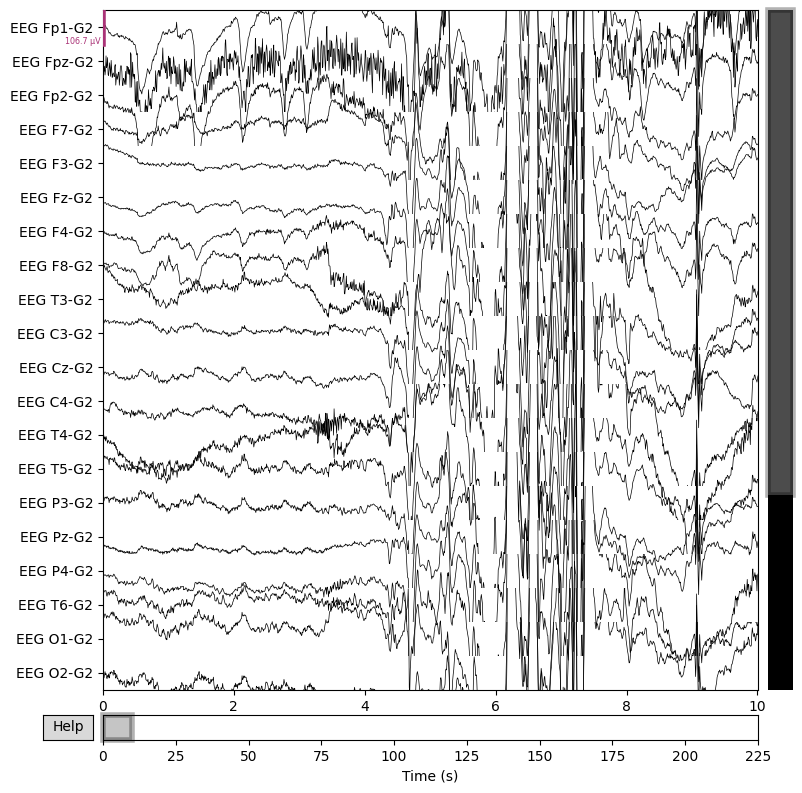

In [ ]:
# EDF - файл содержит многоканальную запись ЭЭГ
# ECG - файл содержит запись электрокардиограммы
data_from_raw_edf.plot(scalings = 'auto', show = False)
# список каналов из файла EDF
print(data_from_raw_edf.ch_names)

In [ ]:
eeg_data, eeg_times = data_from_raw_edf.get_data(return_times=True)
print('число отчетов во временном ряду:',len(eeg_times))
# устанавливаем диапазон для обработки данных
t_index_begin = 1500
t_index_end = 20000
t = eeg_times[t_index_begin:t_index_end]
# значение времени = конец сигнала
T = t[-1]
# число элементов во временном ряду
N = len(t)
# выгружаем в выходную переменную, например, первый (в Питоне он нулевой индекс имеет) канал
y = eeg_data[5, t_index_begin:t_index_end]

число отчетов во временном ряду: 28800


# Обработка сигнала: спект Фурье и Вейвлет-преобразование

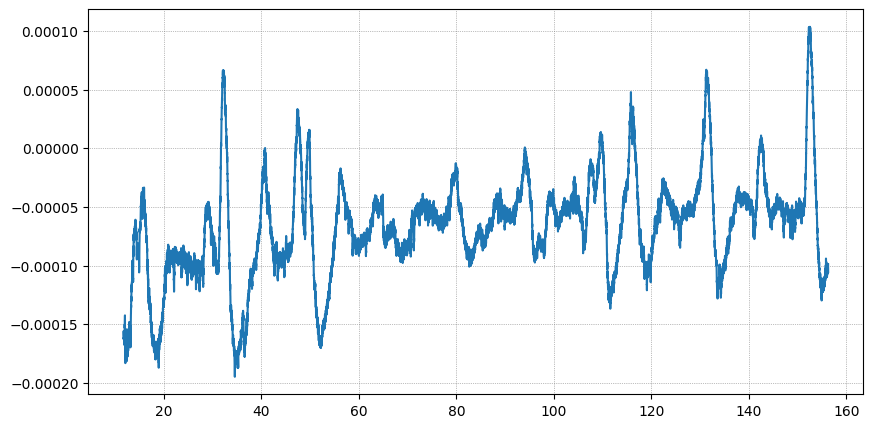

In [ ]:
# График сигнала во времени
plt.figure(figsize=(10, 5))
plt.plot(t,y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

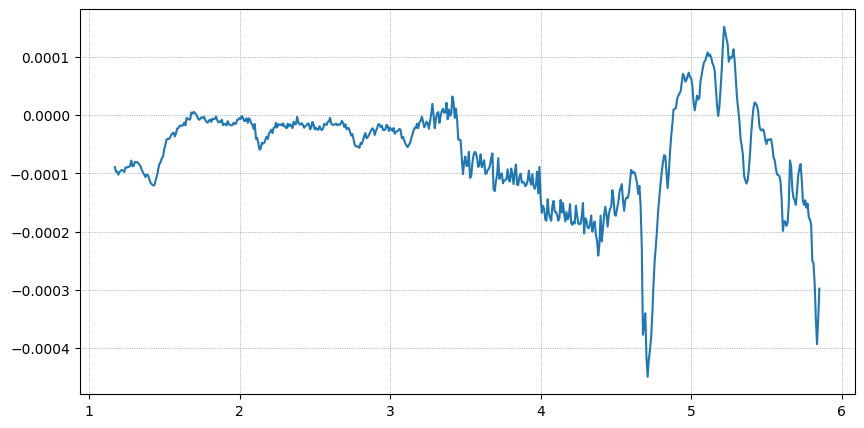

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(t[150:750], y[150:750])
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

число точек в диапазоне преобразования Фурье: 9250
максимальная частота 59.1965598279914


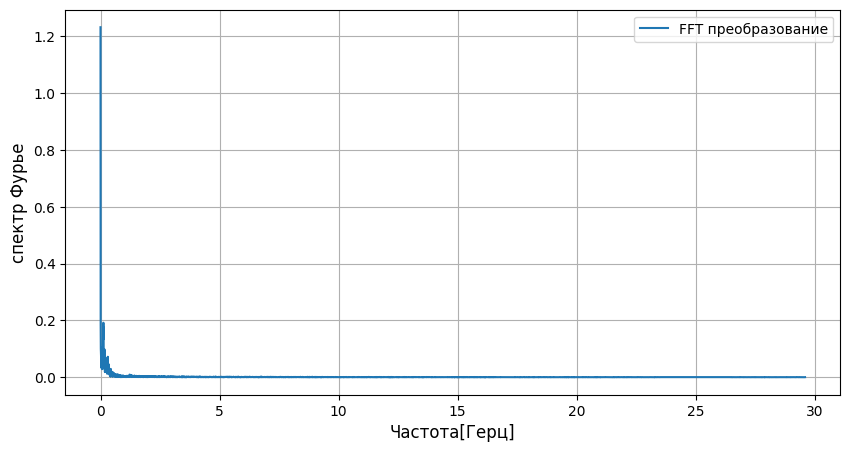

In [ ]:
from scipy.fft import fft, fftfreq

yfft = fft(y)
xf = fftfreq(N, T/N)[:N//2]
yf = np.abs(yfft[0:N//2])
# устанавливаем максимальную частоту для отображения на графике преобразования Фурье
index_f_viewmax = len(xf)//2
print('число точек в диапазоне преобразования Фурье:',len(xf))
print('максимальная частота', xf[-1])
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть
plt.figure(figsize=(10, 5))
plt.plot(xf[0:index_f_viewmax], yf[0:index_f_viewmax], label='FFT преобразование')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
#plt.xticks(np.arange(1, np.max(xf[0:100]), 2))
plt.grid()
plt.legend()
plt.show()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


<ipython-input-38-bb16cd963a9c>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data_from_raw_edf.plot_psd(fmin=1, fmax=30, tmax=np.inf, show=False)


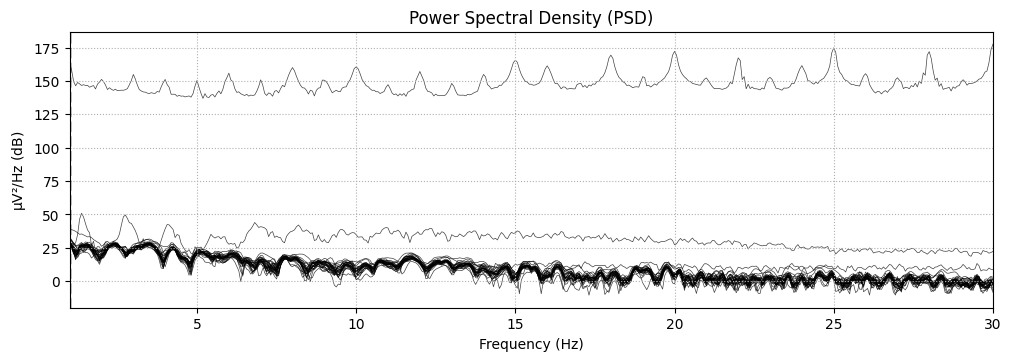

In [ ]:
# Построение спектра плотности мощности
data_from_raw_edf.plot_psd(fmin=1, fmax=30, tmax=np.inf, show=False)
plt.title('Power Spectral Density (PSD)')
plt.show()

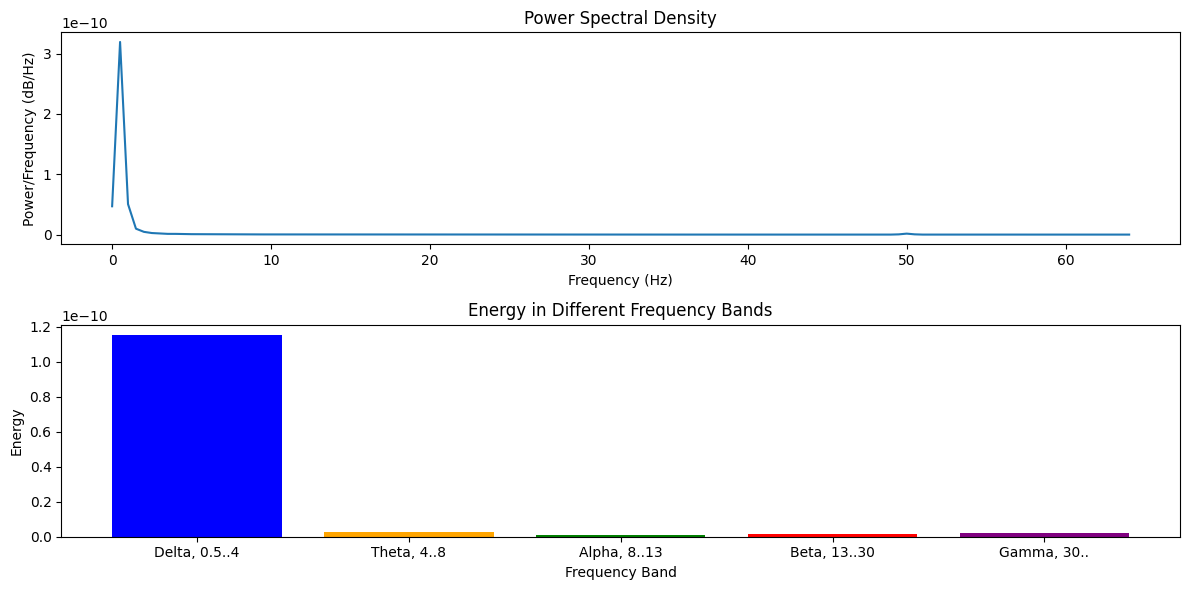

In [ ]:
from scipy.signal import welch

# Функция для вычисления энергии в заданном частотном диапазоне
def compute_energy_in_frequency_band(freqs, psd, band):
    indices = np.where((freqs >= band[0]) & (freqs <= band[1]))[0]
    energy = np.trapz(psd[indices], freqs[indices])
    return energy

# Функция для построения спектрограммы и вычисления энергии в различных частотных диапазонах
def plot_spectrogram_and_energy(signal, sample_rate):
    # Вычисление мощности спектра с помощью метода Велча
    freqs, psd = welch(signal, sample_rate)#, nperseg=1024)

    # Определение частотных диапазонов
    delta_band = (0.5, 4)
    theta_band = (4, 8)
    alpha_band = (8, 13)
    beta_band = (13, 30)
    gamma_band = (30, 100)

    # Вычисление энергии в каждом частотном диапазоне
    energy_delta = compute_energy_in_frequency_band(freqs, psd, delta_band)
    energy_theta = compute_energy_in_frequency_band(freqs, psd, theta_band)
    energy_alpha = compute_energy_in_frequency_band(freqs, psd, alpha_band)
    energy_beta  = compute_energy_in_frequency_band(freqs, psd, beta_band)
    energy_gamma = compute_energy_in_frequency_band(freqs, psd, gamma_band)

    # Построение спектрограммы
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(freqs, psd)
    plt.title('Power Spectral Density')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')

    # Построение энергии в различных частотных диапазонах
    plt.subplot(2, 1, 2)
    bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
    energies = [energy_delta, energy_theta, energy_alpha, energy_beta, energy_gamma]
    plt.bar(bands, energies, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title('Energy in Different Frequency Bands')
    plt.xlabel('Frequency Band')
    plt.xticks(np.arange(5), ('Delta, 0.5..4', 'Theta, 4..8', 'Alpha, 8..13', 'Beta, 13..30', 'Gamma, 30..'))
    plt.ylabel('Energy')

    plt.tight_layout()
    plt.show()

#sample_rate частота дискретизации
sample_rate = 1 / (t[1] - t[0])
plot_spectrogram_and_energy(y, sample_rate)


In [ ]:
# перечень вейвлетов
wavlist_continuous = pywt.wavelist(kind='continuous')
wavlist_discrete = pywt.wavelist(kind='discrete')

In [ ]:
# устанавливаем максимальное значение сдвига
# не путать с частотой
scale_max = 30
scales = np.arange(1, scale_max, 0.5)  # No. of scales

wavelet_core = 'mexh'

dt = t[1] - t[0]
coef, freqs = pywt.cwt(y[t_index_begin:t_index_end], scales, wavelet_core, dt)

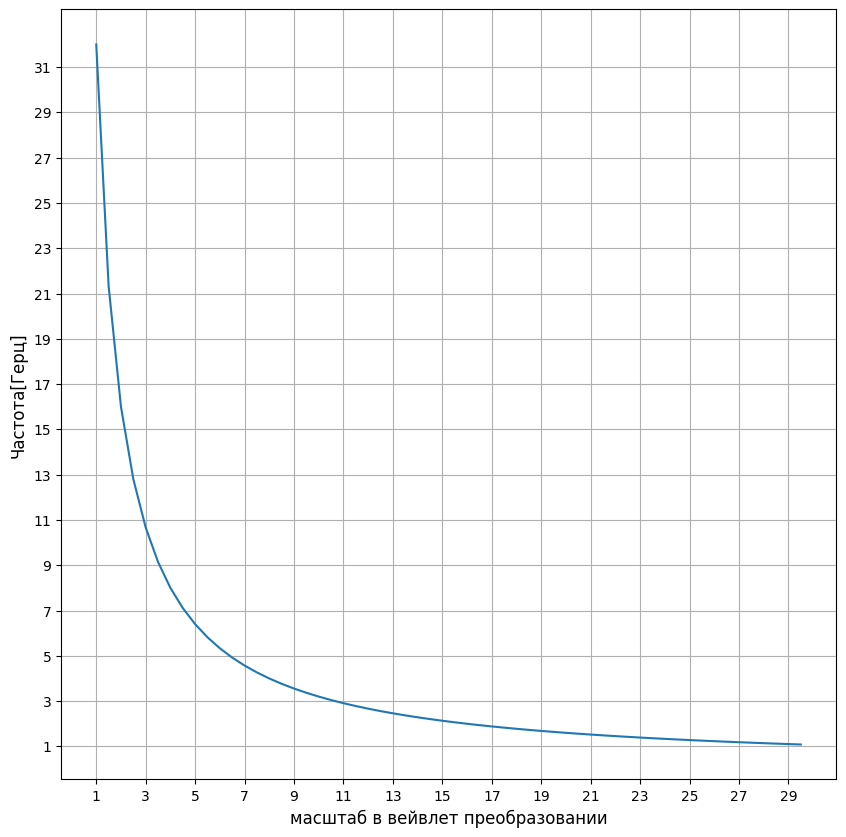

In [ ]:
# вейвлет-преобразование построено относительно масштаба материнского вейвлета
# чтобы вернуться в область частот - необходимо перевести масштаб в частоту!
f = pywt.scale2frequency(wavelet_core, scales)/(T/N)

# изобразим график зависимости частоты и масштаба
plt.figure(figsize=(10, 10))
plt.grid()
plt.yticks(np.arange(1, max(freqs)+1, 2))
plt.xticks(np.arange(1, max(scales)+1, 2))
plt.ylabel('Частота[Герц]', fontsize=12)
plt.xlabel('масштаб в вейвлет преобразовании', fontsize=12)
plt.plot(scales, freqs)

Text(0.5, 1.0, 'сигналв области времени')

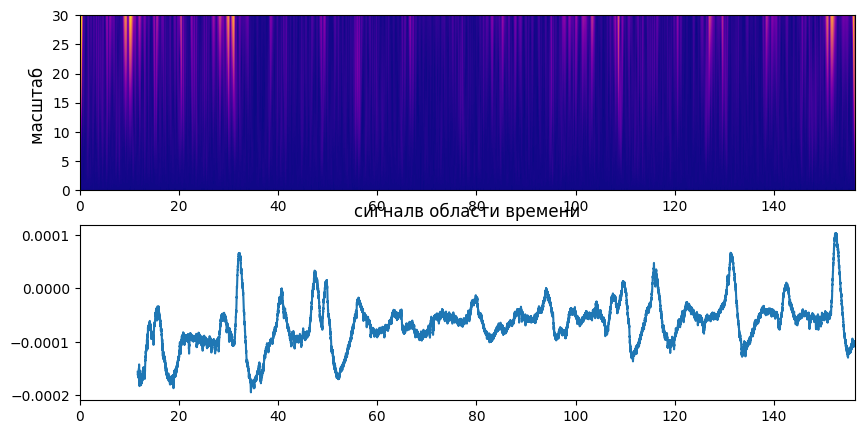

In [ ]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(211)
plt.imshow(abs(coef), extent=[0, T, scale_max, 0], interpolation='bilinear', cmap='plasma', aspect='auto')
plt.gca().invert_yaxis ()
plt.ylabel('масштаб ', fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(t, y)
ax2.set_title("сигналв области времени")

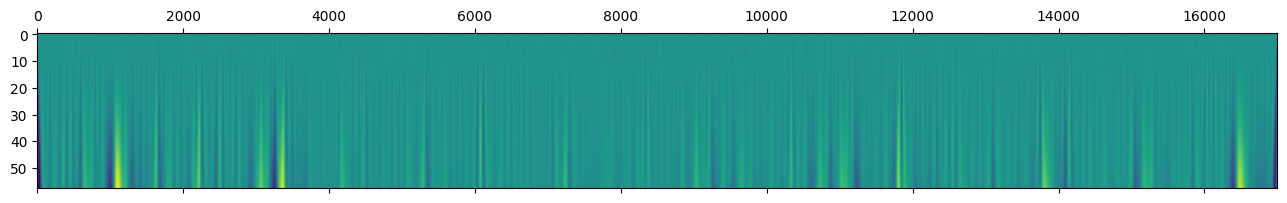

In [ ]:
plt.matshow(coef,aspect = 'auto')

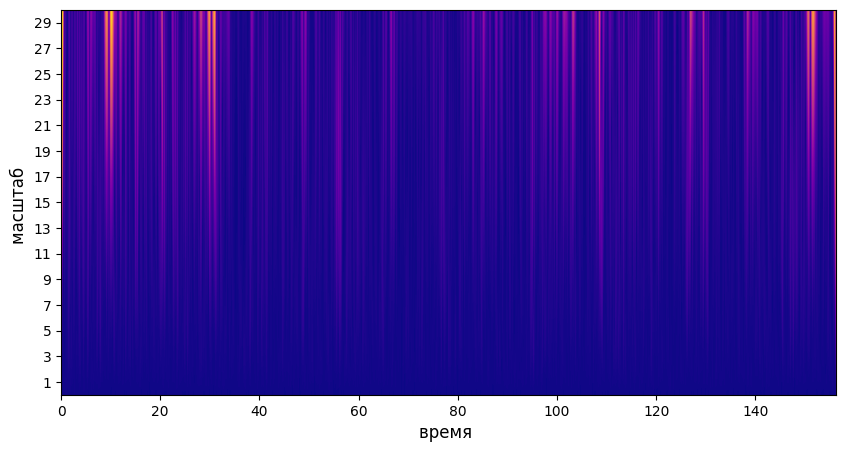

In [ ]:
#Plotting scalogram
plt.figure(figsize=(10, 5))
plt.imshow(abs(coef), extent=[0, T, scale_max, 0], interpolation='bilinear', cmap='plasma', aspect='auto')
#plt.imshow(abs(coef), interpolation='bilinear', cmap='plasma', aspect='auto')
plt.gca().invert_yaxis ()
plt.yticks(np.arange(1, scale_max, 2))
plt.ylabel('масштаб ', fontsize=12)
plt.xlabel('время ', fontsize=12)
plt.show()

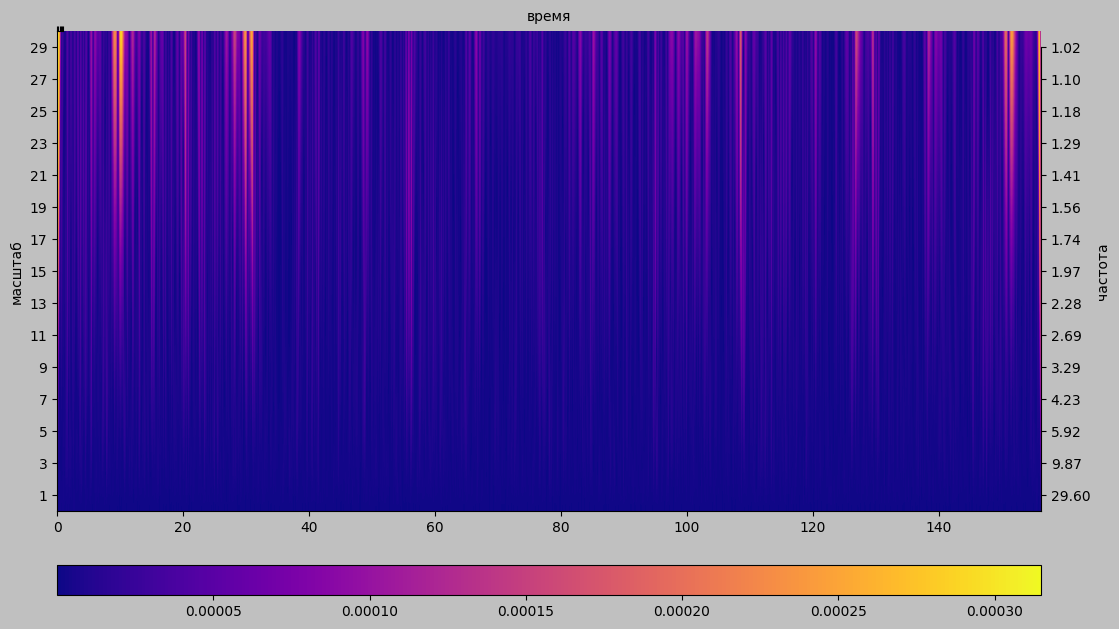

In [ ]:
from matplotlib.figure import cbar
from matplotlib.ticker import FuncFormatter

#Plotting dual axis scalogram
test = 'plasma'
f1 = plt.figure(1)
f1.set_size_inches(12, 6)
f1.patch.set_facecolor('#c0c0c0')

import mpl_toolkits.axes_grid1 as axes_grid1
ax1 = axes_grid1.host_axes([0.09, 0.15, 0.82, 0.80])

axc = f1.add_axes([0.09, 0.01, 0.82, 0.05])
im1 = ax1.imshow(abs(coef), cmap=test, aspect='auto', extent=[0, T, scale_max, 0])
ax1.invert_yaxis()
ax1.set_yticks(np.arange(1, scale_max, 2))
cbar.Colorbar(axc, im1, orientation='horizontal')

ax2 = ax1.twin()
# make ticklabels on the top invisible
ax2.axis["top"].toggle(ticklabels=False)

def MyTicks(x, pos):
  x = pywt.scale2frequency(wavelet_core, x)/(T/N)
  return '%2.2f' % x

#fmtr = matplotlib.ticker.FuncFormatter(MyTicks)
fmtr = FuncFormatter(MyTicks)

ax2.yaxis.set_major_formatter(fmtr)
ax2.invert_yaxis()
ax2.set_yticks(np.arange(1, scale_max, 2))
ax2.set_xlabel('время')
ax2.set_ylabel('частота')
ax1.set_ylabel('масштаб')

plt.show()

# Пример фильтрации сигналов

In [ ]:
from scipy import signal

In [ ]:
# Пример предобработки: фильтрация сигнала
fs = 256  # частота дискретизации
lowcut = 0.1  # нижняя частота среза фильтра
highcut = 50  # верхняя частота среза фильтра

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

In [ ]:
filtered_signals = np.apply_along_axis(butter_bandpass_filter, axis=0, arr=y, lowcut=lowcut, highcut=highcut, fs=fs)

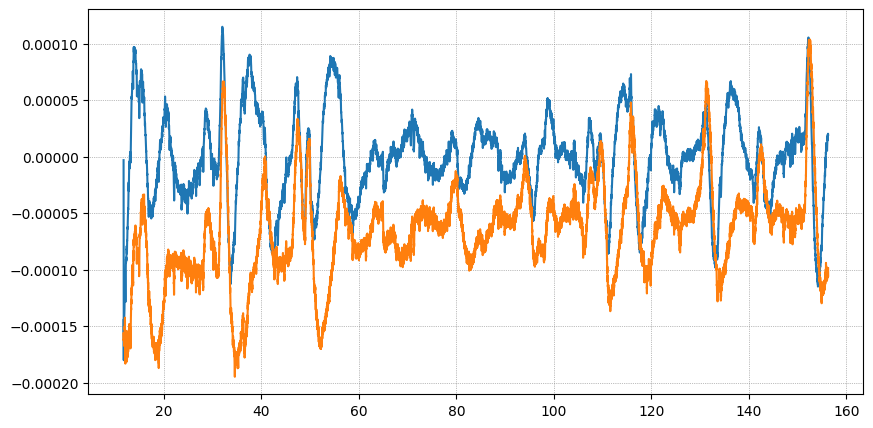

In [ ]:
# График отфильтрованного сигнала во времени
plt.figure(figsize=(10, 5))
plt.plot(t,filtered_signals)
plt.plot(t,y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

# Характеристики сигнала

In [ ]:
from scipy.signal import welch

In [ ]:
# Пример извлечения характеристик: вычисление спектральных характеристик
def compute_spectral_features(signal, fs):
    f, psd = welch(signal, fs=fs)
    spectral_features = {'mean_power': np.mean(psd), 'max_power': np.max(psd)}
    return spectral_features

spectral_features = np.apply_along_axis(compute_spectral_features, axis=0, arr=filtered_signals, fs=fs)


In [ ]:
print(spectral_features)

{'mean_power': 1.7866914050882536e-12, 'max_power': 1.6609435900309203e-10}


# *discrete* wavelets

https://discourse.julialang.org/t/plots-with-a-secondary-non-linear-axis-scale/56661
https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

In [ ]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

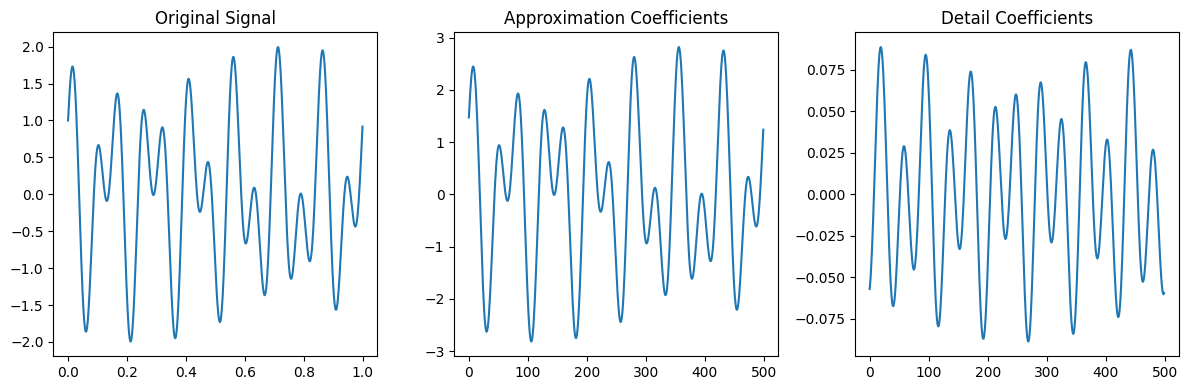

In [ ]:
# Generate the signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.cos(2.0 * np.pi * 7 * t) + np.sin(2.0 * np.pi * 13 * t)

# Apply DWT
coeffs = pywt.dwt(signal, 'db1')
cA, cD = coeffs

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.subplot(1, 3, 2)
plt.plot(cA)
plt.title("Approximation Coefficients")
plt.subplot(1, 3, 3)
plt.plot(cD)
plt.title("Detail Coefficients")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'ошибка восстановления сигнала')

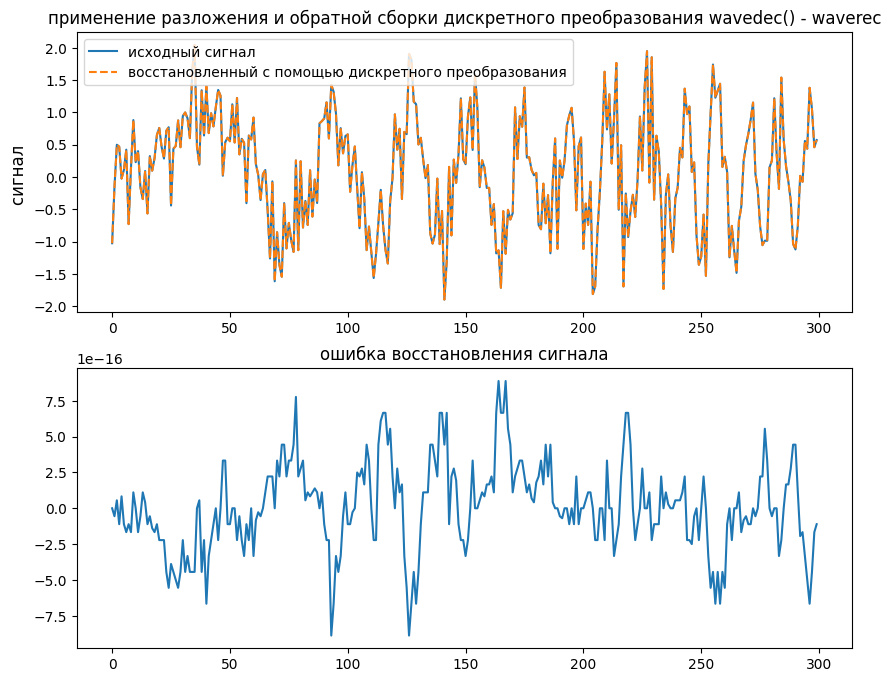

In [ ]:
num = 300
x = np.linspace(0, 1, num=num)
signal = np.sin(25 * np.pi * x**2) + np.random.normal(0, scale=0.5, size=len(x))

coeffs = pywt.wavedec(signal, 'db4', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db4')

plt.figure(figsize=(10, 8))

ax1 = plt.subplot(211)
plt.plot(signal[:num], label='исходный сигнал')
plt.plot(reconstructed_signal[:num], label='восстановленный с помощью дискретного преобразования', linestyle='--')
ax1.legend(loc='upper left')
ax1.set_title('применение разложения и обратной сборки дискретного преобразования wavedec() - waverec')

plt.ylabel('сигнал ', fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(signal[:num] - reconstructed_signal[:num])
ax2.set_title("ошибка восстановления сигнала")

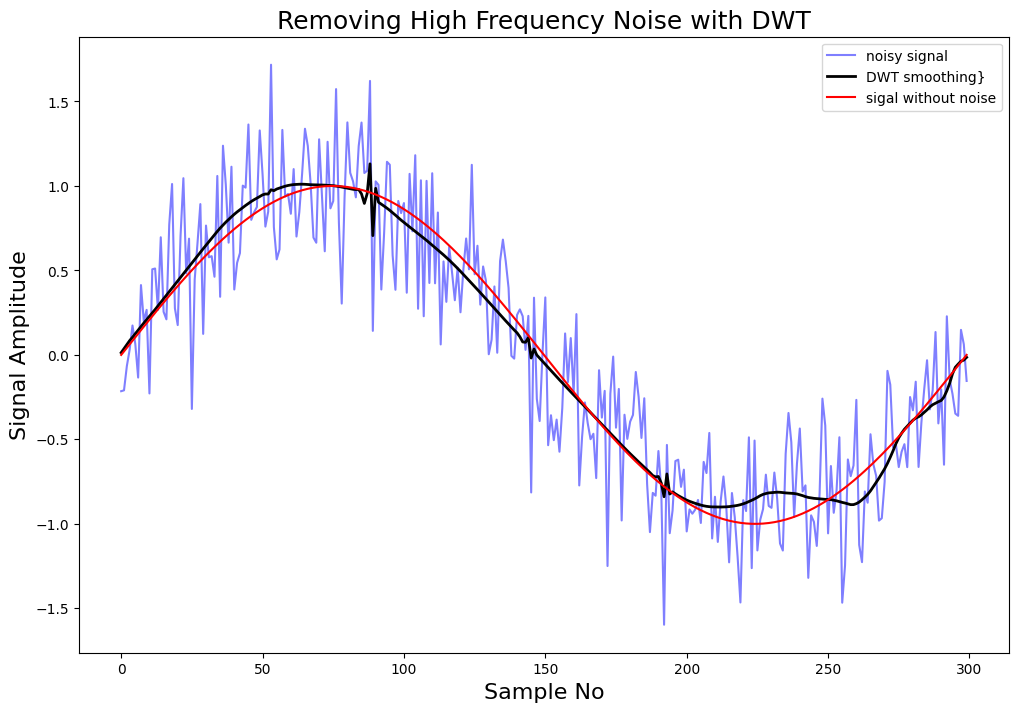

In [ ]:
import random
num = 300
x = np.linspace(0, 1, num=num)
signal = np.sin(2*np.pi * x) + np.random.normal(0, scale=0.3, size=len(x))
signal_ideal = np.sin(2*np.pi * x)

def lowpassfilter(signal, thresh = 0.7, wavelet = "db4"):
    thresh = thresh * np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(signal, color="b", alpha=0.5, label='noisy signal')
rec = lowpassfilter(signal, 0.4)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.plot(signal_ideal, 'r', label='sigal without noise')
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()

In [ ]:
import math

In [ ]:
# Create signal
t_n = 100
N = 200
xc = np.linspace(0, t_n, num=N)
xd = np.linspace(0, t_n, num=32)
sig = np.sin(2*np.pi * 64 * xc[:32]) * (1 - xd)
composite_signal3 = np.concatenate([np.zeros(32), sig[:32], np.zeros(N-32-32)])

# Use the Daubechies wavelet
w = pywt.Wavelet('db1')
# Perform Wavelet transform up to log2(N) levels
lvls = math.ceil(math.log2(N))
coeffs = pywt.wavedec(composite_signal3, w, level=lvls)
# Each level of the WT will split the frequency band in two and apply a
# WT on the highest band. The lower band then gets split into two again,
# and a WT is applied on the higher band of that split. This repeats
# 'lvls' times.
#
# Since the amount of samples in each step decreases, we need to make
# sure that we repeat the samples 2^i times where i is the level so
# that at each level, we have the same amount of transformed samples
# as in the first level. This is only necessary because of plotting.
cc = np.abs(np.array([coeffs[-1]]))

for i in range(lvls - 1):
  cc = np.concatenate(np.abs([cc, np.array([np.repeat(coeffs[lvls - 1 - i], pow(2, i + 1))])]))


plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Discrete Wavelet Transform')
# X-axis has a linear scale (time)
x = np.linspace(start=0, stop=1, num=N//2)
# Y-axis has a logarithmic scale (frequency)
y = np.logspace(start=lvls-1, stop=0, num=lvls, base=2)
X, Y = np.meshgrid(x, y)
plt.pcolormesh(X, Y, cc)

use_log_scale = False

if use_log_scale:
    plt.yscale('log')
else:
    yticks = [pow(2, i) for i in range(lvls)]
    plt.yticks(yticks)

plt.tight_layout()
plt.show()

<ipython-input-24-8a78ba936a9f>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cc = np.concatenate(np.abs([cc, np.array([np.repeat(coeffs[lvls - 1 - i], pow(2, i + 1))])]))


ValueError: ignored

#Алгоритмы DFA (detrended flactuation analisys)

In [ ]:
from scipy.stats import linregress

In [ ]:
def dfa(signal, scales):
    flucts = []
    for s in scales:
        windows = np.array([signal[i:i + s] for i in range(0, len(signal), s) if i + s <= len(signal)])
        detrended_windows = np.array([window - linregress(np.arange(s), window)[0] * np.arange(s) - linregress(np.arange(s), window)[1] for window in windows])
        F = np.sqrt(np.mean(detrended_windows**2, axis=1))
        flucts.append(np.mean(F))
    return np.array(flucts)

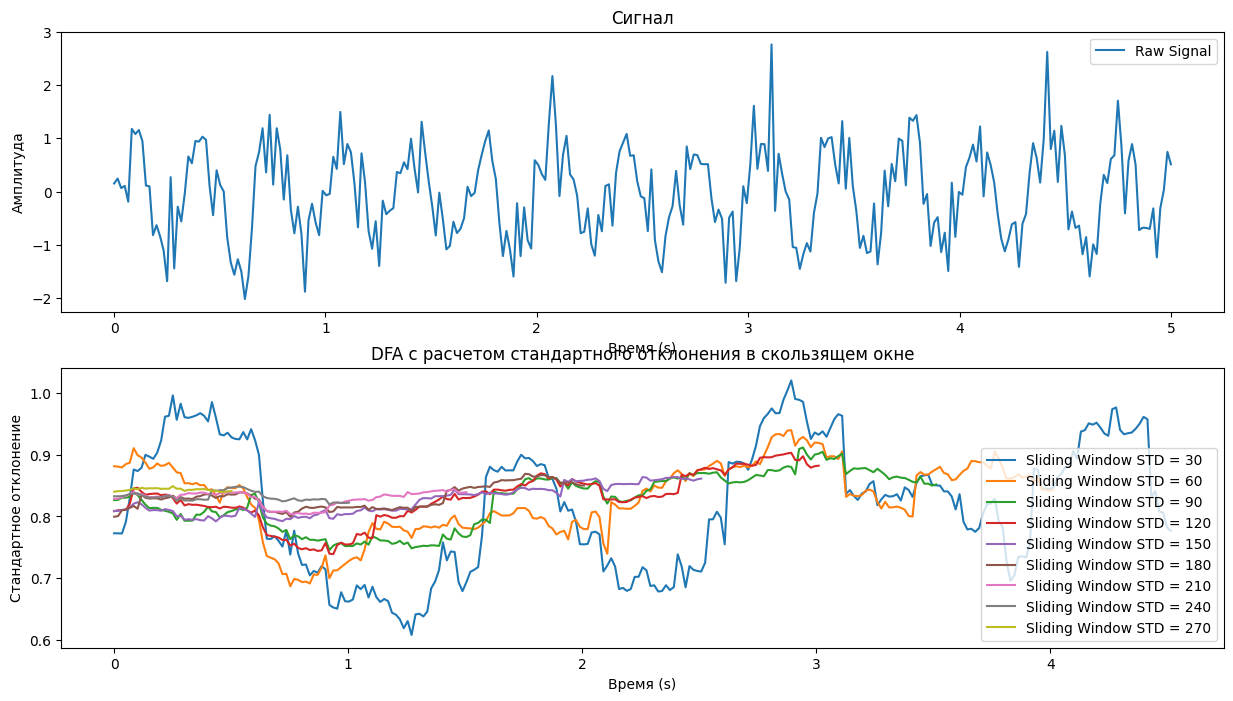

In [ ]:
def sliding_window_std(signal, window_size):
    std_vals = np.array([np.std(signal[i:i+window_size]) for i in range(len(signal) - window_size + 1)])
    return std_vals

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Raw Signal')
plt.title('Сигнал')
plt.xlabel('Время (s)')
plt.ylabel('Амплитуда')
plt.legend()

plt.subplot(2, 1, 2)
for k in range(1,10):
  #sfreq = raw.info['sfreq']
  sfreq = N//10;
  window_size = int(sfreq * k)
  std_vals = sliding_window_std(y, window_size)
  plt.plot(t[:-(window_size-1)], std_vals, label='Sliding Window STD = %i' %window_size)

plt.title('DFA с расчетом стандартного отклонения в скользящем окне')
plt.xlabel('Время (s)')
plt.ylabel('Стандартное отклонение')
plt.legend()
plt.show()

In [ ]:
scales = np.arange(10, len(y), 100)
flucts = dfa(y, scales)
log_scales = np.log2(scales)
log_flucts = np.log2(flucts)
hurst_exponent, _, _, _, _ = linregress(log_scales, log_flucts)

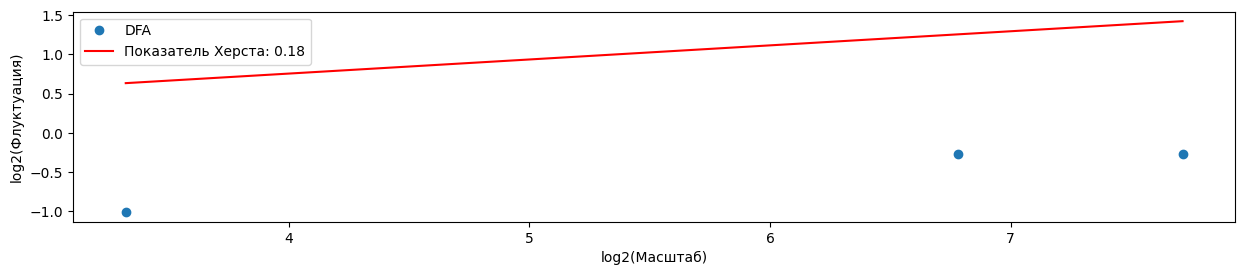

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(log_scales, log_flucts, 'o', label='DFA')
plt.plot(log_scales, hurst_exponent*log_scales + _, 'r', label=f'Показатель Херста: {hurst_exponent:.2f}')
plt.xlabel('log2(Масштаб)')
plt.ylabel('log2(Флуктуация)')
plt.legend()